In [775]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import ast
import random as rn
import numpy as np
import math

In [853]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.metrics import r2_score

In [828]:
baza = pd.read_csv('taxi 400k.csv')

In [829]:
baza.head(4)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]"
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[-8.642196,41.160114],[-8.644455,41.160492],[-8.646921,41.160951],[-8.649999,41.161491],[-8.653167,41.162031],[-8.656434,41.16258],[-8.660178,41.163192],[-8.663112,41.163687],[-8.666235,41.1642],[-8.669169,41.164704],[-8.670852,41.165136],[-8.670942,41.166576],[-8.66961,41.167962],[-8.668098,41.168988],[-8.66664,41.170005],[-8.665767,41.170635],[-8.66574,41.170671]]"
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-8.614215,41.140278],[-8.614773,41.140368],[-8.615907,41.140449],[-8.616609,41.140602],[-8.618472,41.141412],[-8.620623,41.142789],[-8.622558,41.144094],[-8.62506,41.144805],[-8.627436,41.144733],[-8.630082,41.145174],[-8.6319,41.146461],[-8.632584,41.147316],[-8.631252,41.148774],[-8.629713,41.150628],[-8.628804,41.152077],[-8.628579,41.152464],[-8.62875,41.152662],[-8.630424,41.15277],[-8.632683,41.152779],[-8.635131,41.152563],[-8.637705,41.153013],[-8.64036,41.15358],[-8.642205,41.154021],[-8.644068,41.154507],[-8.646453,41.154336],[-8.648613,41.1543],[-8.649504,41.154336],[-8.649837,41.154354],[-8.649837,41.1543],[-8.649882,41.154282],[-8.649936,41.1543],[-8.6499,41.154264],[-8.599383,41.141736],[-8.59653,41.140566],[-8.65008,41.154291],[-8.650395,41.153814],[-8.650377,41.153832],[-8.650359,41.153787],[-8.649891,41.153166],[-8.649369,41.152572],[-8.649198,41.152374],[-8.649711,41.151213],[-8.649117,41.150466],[-8.649117,41.149062],[-8.648613,41.148261],[-8.648424,41.148225],[-8.647587,41.148405],[-8.64594,41.148414],[-8.643861,41.148135],[-8.642763,41.148027],[-8.640918,41.14836],[-8.637759,41.148351],[-8.635338,41.147964],[-8.633277,41.147172],[-8.631513,41.146146],[-8.629776,41.14503],[-8.627814,41.144643],[-8.625996,41.144769],[-8.624088,41.144463],[-8.621325,41.143401],[-8.619444,41.141961],[-8.617365,41.140863],[-8.61597,41.14053]]"
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[-8.574696,41.151933],[-8.57466,41.15196],[-8.574723,41.151933],[-8.574714,41.151924],[-8.574714,41.151924],[-8.575164,41.150934],[-8.577135,41.150232],[-8.57853,41.148639],[-8.579745,41.147316],[-8.579358,41.146173],[-8.580744,41.14503],[-8.582904,41.14512],[-8.58438,41.146479],[-8.610849,41.145876],[-8.610012,41.146479],[-8.609058,41.146866],[-8.608968,41.147055],[-8.586027,41.148702],[-8.587197,41.149224],[-8.588205,41.148963],[-8.588835,41.147604],[-8.590176,41.147082],[-8.592543,41.146614],[-8.594721,41.146245],[-8.596737,41.146317],[-8.59869,41.146119],[-8.598816,41.146101],[-8.600193,41.146155],[-8.601057,41.146101],[-8.602344,41.14575],[-8.602785,41.145705],[-8.60328,41.145597],[-8.604045,41.145417],[-8.604657,41.144256],[-8.605854,41.142555],[-8.607951,41.142753],[-8.607978,41.142825],[-8.607996,41.142879],[-8.607987,41.142888],[-8.608005,41.142915],[-8.607996,41.142915]]"


In [779]:
baza.describe()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP
count,4.000000e+05,82253.000000,198364.000000,4.000000e+05,4.000000e+05
mean,1.376474e+18,23486.085663,30.422607,2.000035e+07,1.376474e+09
std,2.286724e+15,19692.943272,17.825948,2.098117e+02,2.286724e+06
min,1.372637e+18,2001.000000,1.000000,2.000000e+07,1.372637e+09
25%,1.374427e+18,5444.000000,15.000000,2.000017e+07,1.374427e+09
50%,1.376425e+18,17217.000000,27.000000,2.000035e+07,1.376425e+09
75%,1.378560e+18,39654.000000,49.000000,2.000052e+07,1.378560e+09
max,1.380280e+18,63882.000000,63.000000,2.000098e+07,1.380280e+09


In [830]:
#usuwanie kolumn
baza.drop([ 'ORIGIN_CALL','ORIGIN_STAND','TAXI_ID'], axis=1, inplace=True)

In [781]:
len(baza)

400000

In [782]:
def usun_wiersze_z_brakami(baza):
    baza.drop(baza[baza['MISSING_DATA'] == True].index, inplace=True)
    baza.reset_index(drop=True, inplace=True)

usun_wiersze_z_brakami(baza)  #usuwam wszystkie wiersze gdzie missing data jest true
baza.drop(['MISSING_DATA'], axis=1, inplace=True)

In [783]:
len(baza)

399997

In [784]:
baza.sort_values('TIMESTAMP',inplace = True)

In [785]:
baza.head()

,TRIP_ID,TIMESTAMP,DAY_TYPE,POLYLINE
577,1372636853620000380,1372636853,A,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8.610309,41.14089],[-8.613657,41.141358],[-8.614602,41.141484],[-8.614242,41.142618],[-8.61363,41.143239],[-8.612883,41.143761],[-8.612208,41.144238],[-8.611542,41.144724],[-8.611227,41.144931],[-8.611191,41.14494],[-8.611101,41.145012],[-8.610822,41.145552],[-8.610516,41.146119],[-8.609355,41.146695],[-8.608311,41.147694],[-8.607051,41.148468],[-8.604792,41.147883],[-8.604045,41.147685],[-8.603865,41.146956],[-8.604531,41.146182],[-8.605593,41.145534],[-8.605854,41.145345],[-8.60589,41.145345]]"
3,1372636854620000520,1372636854,A,"[[-8.574678,41.151951],[-8.574705,41.151942],[-8.574696,41.151933],[-8.57466,41.15196],[-8.574723,41.151933],[-8.574714,41.151924],[-8.574714,41.151924],[-8.575164,41.150934],[-8.577135,41.150232],[-8.57853,41.148639],[-8.579745,41.147316],[-8.579358,41.146173],[-8.580744,41.14503],[-8.582904,41.14512],[-8.58438,41.146479],[-8.610849,41.145876],[-8.610012,41.146479],[-8.609058,41.146866],[-8.608968,41.147055],[-8.586027,41.148702],[-8.587197,41.149224],[-8.588205,41.148963],[-8.588835,41.147604],[-8.590176,41.147082],[-8.592543,41.146614],[-8.594721,41.146245],[-8.596737,41.146317],[-8.59869,41.146119],[-8.598816,41.146101],[-8.600193,41.146155],[-8.601057,41.146101],[-8.602344,41.14575],[-8.602785,41.145705],[-8.60328,41.145597],[-8.604045,41.145417],[-8.604657,41.144256],[-8.605854,41.142555],[-8.607951,41.142753],[-8.607978,41.142825],[-8.607996,41.142879],[-8.607987,41.142888],[-8.608005,41.142915],[-8.607996,41.142915]]"
0,1372636858620000589,1372636858,A,"[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]"
10,1372636875620000233,1372636875,A,"[[-8.619894,41.148009],[-8.620164,41.14773],[-8.62065,41.148513],[-8.62092,41.150313],[-8.621208,41.151951],[-8.621118,41.153517],[-8.620884,41.155416],[-8.620938,41.155479],[-8.620974,41.155461],[-8.621028,41.155461],[-8.619777,41.155344],[-8.619282,41.155335],[-8.618112,41.155101],[-8.61534,41.154579],[-8.613297,41.153994],[-8.612064,41.153832],[-8.611911,41.155227],[-8.611794,41.156838],[-8.610804,41.157171],[-8.61021,41.15727],[-8.609508,41.157333],[-8.60949,41.157351]]"
64,1372636896620000360,1372636896,A,"[[-8.617599,41.146137],[-8.617581,41.14593],[-8.617383,41.145075],[-8.61651,41.145021],[-8.615466,41.145696],[-8.615232,41.146866],[-8.615196,41.146983],[-8.615187,41.146992],[-8.61561,41.147271],[-8.61624,41.147217],[-8.617338,41.147244],[-8.618049,41.147757],[-8.618931,41.148603],[-8.61993,41.147883],[-8.621379,41.147487],[-8.623944,41.148108],[-8.625096,41.148585],[-8.625699,41.149782],[-8.626014,41.15187],[-8.626644,41.154147],[-8.627697,41.155983],[-8.628579,41.156532],[-8.610723,41.147802],[-8.611722,41.147919],[-8.627976,41.158044],[-8.628804,41.159223],[-8.628264,41.16096],[-8.627598,41.163057],[-8.627211,41.164416],[-8.627832,41.16483],[-8.629776,41.165064],[-8.631567,41.164731],[-8.63163,41.164767],[-8.631873,41.164668],[-8.633718,41.163759],[-8.635743,41.164119],[-8.637912,41.164668],[-8.639271,41.165307],[-8.640252,41.165973],[-8.638803,41.166027],[-8.638425,41.167197],[-8.636499,41.168637],[-8.636625,41.169141]]"


In [786]:
#zamiana timestampa na bardzije przyjazny zapis
baza['year'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).year) 
baza['month'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).month) 
baza['month_day'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).day) 
#baza['hour'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).hour)
baza['hour'] = baza['TIMESTAMP'].apply(lambda x: datetime.datetime.fromtimestamp(x).hour + (0.5 if datetime.datetime.fromtimestamp(x).minute > 30 else 0))
baza['week_day'] = baza['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).weekday()) 

In [787]:
baza.describe() #pierwsze 5 rekordów 


,TRIP_ID,TIMESTAMP,year,month,month_day,hour,week_day
count,3.999970e+05,3.999970e+05,399997.0,399997.000000,399997.000000,399997.000000,399997.000000
mean,1.376474e+18,1.376474e+09,2013.0,7.958712,15.236312,12.764428,2.984890
std,2.286729e+15,2.286729e+06,0.0,0.826982,8.534704,6.451912,1.965115
min,1.372637e+18,1.372637e+09,2013.0,7.000000,1.000000,0.000000,0.000000
25%,1.374427e+18,1.374427e+09,2013.0,7.000000,8.000000,8.000000,1.000000
50%,1.376425e+18,1.376425e+09,2013.0,8.000000,15.000000,13.000000,3.000000
75%,1.378560e+18,1.378560e+09,2013.0,9.000000,22.000000,18.000000,5.000000
max,1.380280e+18,1.380280e+09,2013.0,9.000000,31.000000,23.500000,6.000000


In [788]:
puste_wiersze = baza[baza['POLYLINE'].isnull()]

# Wyświetl wybrane wiersze
print(puste_wiersze)

Empty DataFrame
Columns: [TRIP_ID, TIMESTAMP, DAY_TYPE, POLYLINE, year, month, month_day, hour, week_day]
Index: []


In [789]:
baza[-5:] # ostatnie 5 rekordów

,TRIP_ID,TIMESTAMP,DAY_TYPE,POLYLINE,year,month,month_day,hour,week_day
399986,1380278569620000260,1380278569,A,"[[-8.606331,41.144661],[-8.60688,41.144895],[-8.607006,41.14494],[-8.60715,41.145102],[-8.60715,41.146227],[-8.606907,41.146551],[-8.606862,41.146695],[-8.606844,41.146812],[-8.60679,41.146587],[-8.606709,41.14665],[-8.607033,41.147019],[-8.60733,41.147028],[-8.607348,41.147136],[-8.607366,41.147136],[-8.607708,41.147172],[-8.607987,41.147226],[-8.608095,41.147235],[-8.608131,41.147262],[-8.608149,41.14728],[-8.608203,41.147262],[-8.608995,41.147595],[-8.610129,41.147766],[-8.61057,41.147514],[-8.61093,41.148369],[-8.610786,41.148855],[-8.610525,41.149323],[-8.609553,41.151267],[-8.610039,41.152284],[-8.61003,41.153688],[-8.609427,41.154804],[-8.609328,41.156136],[-8.609103,41.157414],[-8.608887,41.158053],[-8.608626,41.159007],[-8.607816,41.160465],[-8.606169,41.164443],[-8.606421,41.166],[-8.606466,41.167809],[-8.60616,41.169393],[-8.604666,41.171247],[-8.6049,41.172966],[-8.605224,41.173002],[-8.605476,41.173074],[-8.60562,41.17365],[-8.60427,41.173677],[-8.603595,41.173695],[-8.601633,41.173785],[-8.600148,41.174433],[-8.599851,41.17464],[-8.600103,41.175954],[-8.599824,41.176836],[-8.599833,41.176809],[-8.599491,41.17752],[-8.599077,41.178456],[-8.600148,41.178771],[-8.601957,41.179284],[-8.603172,41.179716],[-8.603181,41.179914],[-8.601966,41.179626]]",2013,9,27,12.5,4
399950,1380278662620000249,1380278662,A,"[[-8.640126,41.159718],[-8.64054,41.15979],[-8.641548,41.160087],[-8.641539,41.160519],[-8.640603,41.161383],[-8.639811,41.162193],[-8.639271,41.162634],[-8.638677,41.162967],[-8.637678,41.163687],[-8.636886,41.164209],[-8.636625,41.164218],[-8.636562,41.164245],[-8.636904,41.164533],[-8.638857,41.16474],[-8.640909,41.166135],[-8.642997,41.167926],[-8.645076,41.169663],[-8.647164,41.171301],[-8.649315,41.17302],[-8.65152,41.174937],[-8.653338,41.176548],[-8.654436,41.177493],[-8.654634,41.1777],[-8.654958,41.177997],[-8.654931,41.178015],[-8.654922,41.178042],[-8.654103,41.178465],[-8.6526,41.179086],[-8.652798,41.180814],[-8.653149,41.182029],[-8.654382,41.181687],[-8.654274,41.180886],[-8.654301,41.180778],[-8.654301,41.180778]]",2013,9,27,12.5,4
399960,1380278748620000304,1380278748,A,"[[-8.613972,41.176368],[-8.613963,41.176386],[-8.612514,41.176584],[-8.610633,41.176953],[-8.609526,41.177214],[-8.609265,41.177259],[-8.608689,41.177124],[-8.608086,41.176593],[-8.608491,41.175396],[-8.606808,41.174946],[-8.60598,41.174145],[-8.605314,41.173668],[-8.604,41.173659],[-8.602659,41.173713],[-8.60157,41.173749],[-8.600427,41.174136],[-8.600013,41.17446],[-8.59995,41.174505],[-8.599275,41.173866],[-8.598366,41.172327],[-8.598321,41.172255],[-8.597664,41.171112],[-8.597268,41.169834],[-8.597277,41.169825],[-8.597268,41.169843],[-8.597223,41.169681],[-8.59509,41.169546],[-8.593758,41.169789],[-8.592921,41.168943],[-8.592093,41.168097],[-8.591022,41.168664],[-8.589519,41.1696],[-8.588628,41.170815],[-8.587971,41.171868],[-8.588502,41.172453],[-8.588511,41.172516],[-8.58852,41.17248],[-8.588493,41.172498],[-8.589321,41.172993]]",2013,9,27,12.5,4
399976,1380279405620000681,1380279405,A,"[[-8.690022,41.240403]]",2013,9,27,12.5,4
399991,1380279526620000681,1380279526,A,"[[-8.690112,41.240241],[-8.690175,41.240178],[-8.690148,41.240304],[-8.690085,41.24043],[-8.690085,41.240466],[-8.690103,41.240403],[-8.690058,41.240385],[-8.690121,41.240439],[-8.690157,41.240556],[-8.690085,41.240475],[-8.690103,41.24043]]",2013,9,27,12.5,4


Text(0, 0.5, 'Dzień')

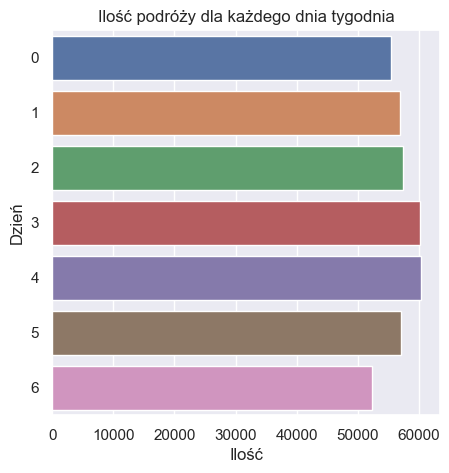

In [790]:
plt.figure(figsize = (5,5))
plt.title('Ilość podróży dla każdego dnia tygodnia')
sns.countplot(y = 'week_day', data = baza)
plt.xlabel('Ilość')
plt.ylabel('Dzień')

Text(0, 0.5, 'Miesiąc')

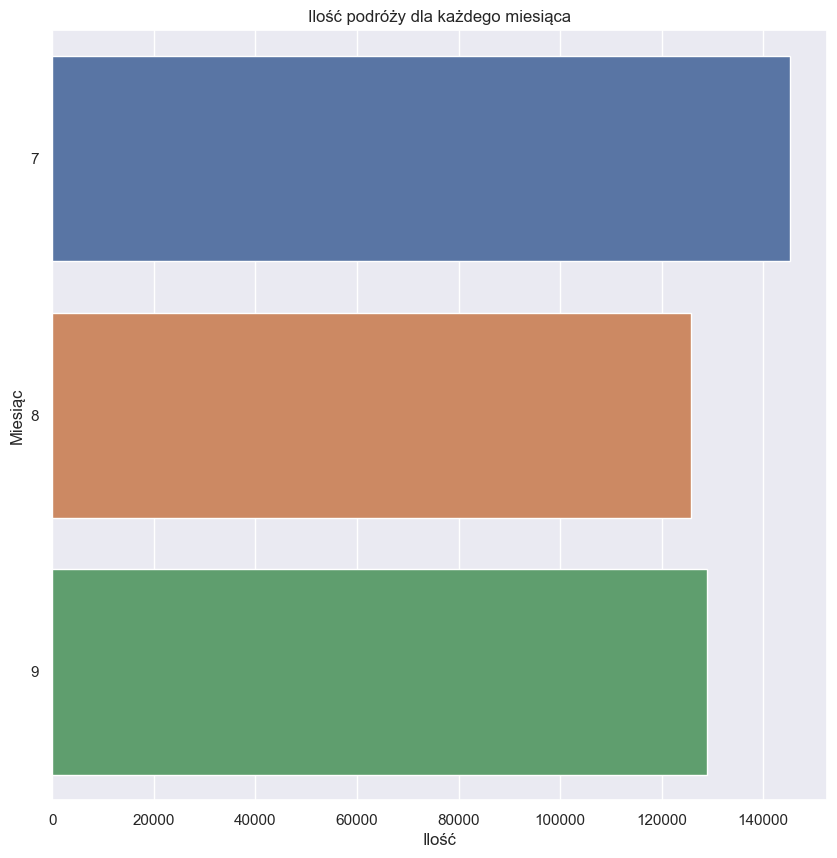

In [791]:
plt.figure(figsize = (10,10))
plt.title('Ilość podróży dla każdego miesiąca')
sns.countplot(y = 'month', data = baza)
plt.xlabel('Ilość')
plt.ylabel('Miesiąc')

Text(0, 0.5, 'Godzina')

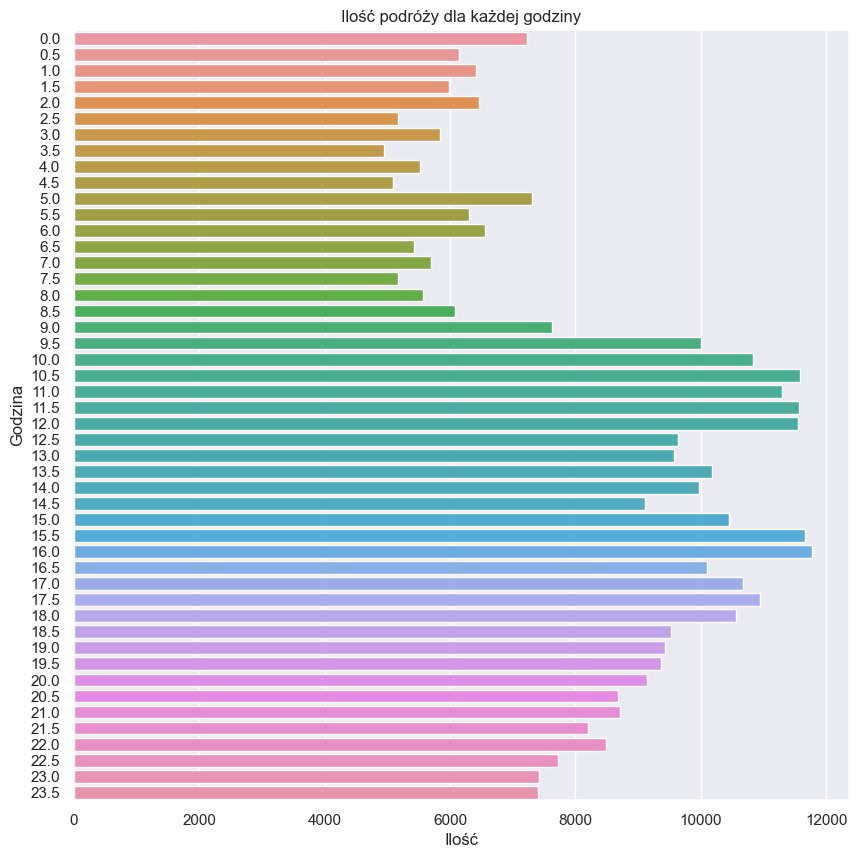

In [792]:
plt.figure(figsize = (10,10))
plt.title('Ilość podróży dla każdej godziny')
sns.countplot(y = 'hour', data = baza)
plt.xlabel('Ilość')
plt.ylabel('Godzina')

In [793]:
baza.shape

(399997, 9)

In [794]:
baza = baza.drop_duplicates()

In [795]:
baza.shape

(399996, 9)

In [796]:
#Saving the final dataframe for future use.
#baza.to_csv('Cleaned_data.csv', index = None)

In [797]:
new_df = baza[['POLYLINE', 'hour']].copy()

new_df = new_df[:50000]
new_df.head()

,POLYLINE,hour
577,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8.610309,41.14089],[-8.613657,41.141358],[-8.614602,41.141484],[-8.614242,41.142618],[-8.61363,41.143239],[-8.612883,41.143761],[-8.612208,41.144238],[-8.611542,41.144724],[-8.611227,41.144931],[-8.611191,41.14494],[-8.611101,41.145012],[-8.610822,41.145552],[-8.610516,41.146119],[-8.609355,41.146695],[-8.608311,41.147694],[-8.607051,41.148468],[-8.604792,41.147883],[-8.604045,41.147685],[-8.603865,41.146956],[-8.604531,41.146182],[-8.605593,41.145534],[-8.605854,41.145345],[-8.60589,41.145345]]",2.0
3,"[[-8.574678,41.151951],[-8.574705,41.151942],[-8.574696,41.151933],[-8.57466,41.15196],[-8.574723,41.151933],[-8.574714,41.151924],[-8.574714,41.151924],[-8.575164,41.150934],[-8.577135,41.150232],[-8.57853,41.148639],[-8.579745,41.147316],[-8.579358,41.146173],[-8.580744,41.14503],[-8.582904,41.14512],[-8.58438,41.146479],[-8.610849,41.145876],[-8.610012,41.146479],[-8.609058,41.146866],[-8.608968,41.147055],[-8.586027,41.148702],[-8.587197,41.149224],[-8.588205,41.148963],[-8.588835,41.147604],[-8.590176,41.147082],[-8.592543,41.146614],[-8.594721,41.146245],[-8.596737,41.146317],[-8.59869,41.146119],[-8.598816,41.146101],[-8.600193,41.146155],[-8.601057,41.146101],[-8.602344,41.14575],[-8.602785,41.145705],[-8.60328,41.145597],[-8.604045,41.145417],[-8.604657,41.144256],[-8.605854,41.142555],[-8.607951,41.142753],[-8.607978,41.142825],[-8.607996,41.142879],[-8.607987,41.142888],[-8.608005,41.142915],[-8.607996,41.142915]]",2.0
0,"[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]",2.0
10,"[[-8.619894,41.148009],[-8.620164,41.14773],[-8.62065,41.148513],[-8.62092,41.150313],[-8.621208,41.151951],[-8.621118,41.153517],[-8.620884,41.155416],[-8.620938,41.155479],[-8.620974,41.155461],[-8.621028,41.155461],[-8.619777,41.155344],[-8.619282,41.155335],[-8.618112,41.155101],[-8.61534,41.154579],[-8.613297,41.153994],[-8.612064,41.153832],[-8.611911,41.155227],[-8.611794,41.156838],[-8.610804,41.157171],[-8.61021,41.15727],[-8.609508,41.157333],[-8.60949,41.157351]]",2.0
64,"[[-8.617599,41.146137],[-8.617581,41.14593],[-8.617383,41.145075],[-8.61651,41.145021],[-8.615466,41.145696],[-8.615232,41.146866],[-8.615196,41.146983],[-8.615187,41.146992],[-8.61561,41.147271],[-8.61624,41.147217],[-8.617338,41.147244],[-8.618049,41.147757],[-8.618931,41.148603],[-8.61993,41.147883],[-8.621379,41.147487],[-8.623944,41.148108],[-8.625096,41.148585],[-8.625699,41.149782],[-8.626014,41.15187],[-8.626644,41.154147],[-8.627697,41.155983],[-8.628579,41.156532],[-8.610723,41.147802],[-8.611722,41.147919],[-8.627976,41.158044],[-8.628804,41.159223],[-8.628264,41.16096],[-8.627598,41.163057],[-8.627211,41.164416],[-8.627832,41.16483],[-8.629776,41.165064],[-8.631567,41.164731],[-8.63163,41.164767],[-8.631873,41.164668],[-8.633718,41.163759],[-8.635743,41.164119],[-8.637912,41.164668],[-8.639271,41.165307],[-8.640252,41.165973],[-8.638803,41.166027],[-8.638425,41.167197],[-8.636499,41.168637],[-8.636625,41.169141]]",2.0


In [798]:
new_df['POLYLINE'] = new_df['POLYLINE'].apply(lambda x: ast.literal_eval(x)) #tutaj zamieniam polyline ze stringa na tablice
new_df['FIRST_ELEMENT'] = new_df['POLYLINE'].apply(lambda x: x[0] if len(x) > 0 else None) # wybieram pierwszy element
new_df['LAST_ELEMENT'] = new_df['POLYLINE'].apply(lambda x: x[-1] if len(x) > 0 else None) # wybieram ostatni element
new_df['TIME_IN_SEC'] = new_df['POLYLINE'].apply(lambda x: len(x)*15)
new_df = new_df.drop('POLYLINE', axis=1)
pd.set_option('display.max_colwidth', None)
new_df.head(3)

,hour,FIRST_ELEMENT,LAST_ELEMENT,TIME_IN_SEC
577,2.0,"[-8.610291, 41.140746]","[-8.60589, 41.145345]",375
3,2.0,"[-8.574678, 41.151951]","[-8.607996, 41.142915]",645
0,2.0,"[-8.618643, 41.141412]","[-8.630838, 41.154489]",345


In [799]:
new_df.describe()

,hour,TIME_IN_SEC
count,50000.000000,50000.000000
mean,12.791320,718.956000
std,6.245055,684.457603
min,0.000000,0.000000
25%,9.000000,420.000000
50%,13.000000,615.000000
75%,17.500000,870.000000
max,23.500000,37740.000000


In [800]:
puste_wiersze = new_df[new_df['FIRST_ELEMENT'].isnull() | new_df['LAST_ELEMENT'].isnull()]
print(len(puste_wiersze))

201


In [801]:
new_df = new_df.dropna()
puste_wiersze = new_df[new_df['FIRST_ELEMENT'].isnull() | new_df['LAST_ELEMENT'].isnull()]
print(puste_wiersze)

Empty DataFrame
Columns: [hour, FIRST_ELEMENT, LAST_ELEMENT, TIME_IN_SEC]
Index: []


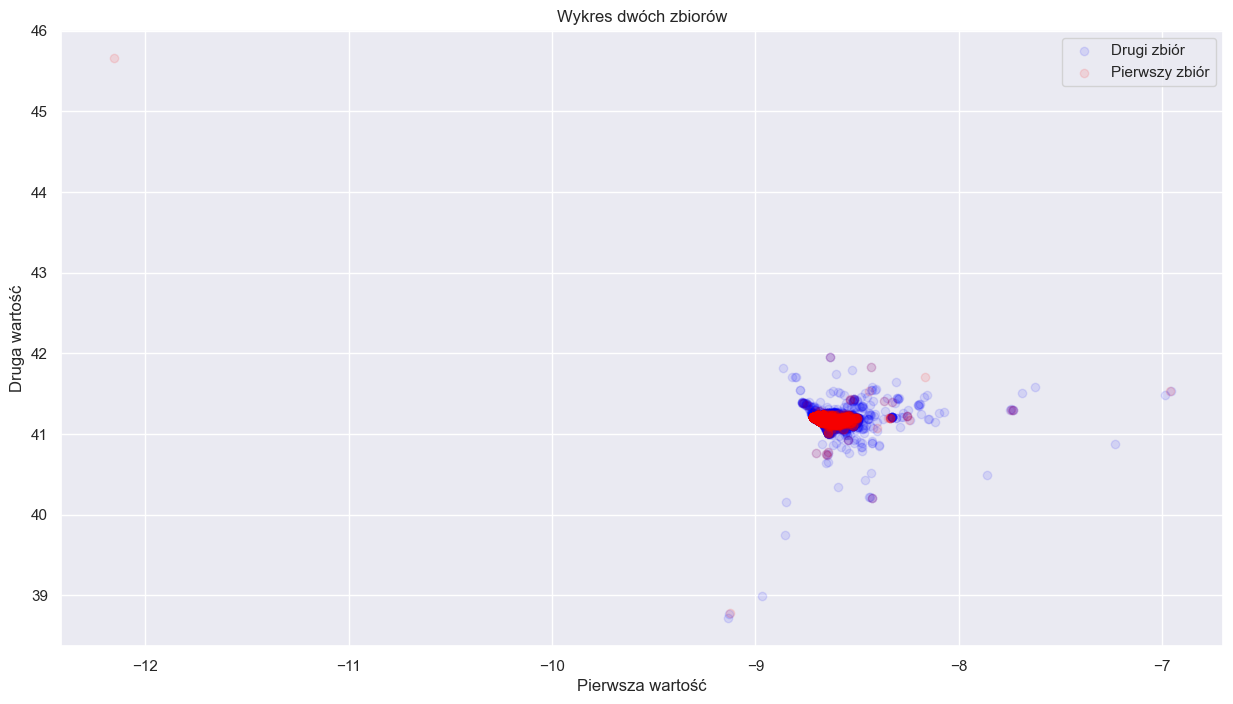

In [802]:
x = new_df['FIRST_ELEMENT'].apply(lambda x: x[0])
y = new_df['FIRST_ELEMENT'].apply(lambda x: x[1])

x2 = new_df['LAST_ELEMENT'].apply(lambda x: x[0])
y2 = new_df['LAST_ELEMENT'].apply(lambda x: x[1])

# Tworzenie wykresu
plt.scatter(x2, y2, c='blue',alpha=0.1, label='Drugi zbiór')
plt.scatter(x, y, c='red',alpha=0.1, label='Pierwszy zbiór')

plt.xlabel('Pierwsza wartość')
plt.ylabel('Druga wartość')
plt.title('Wykres dwóch zbiorów')
plt.legend()
plt.show()

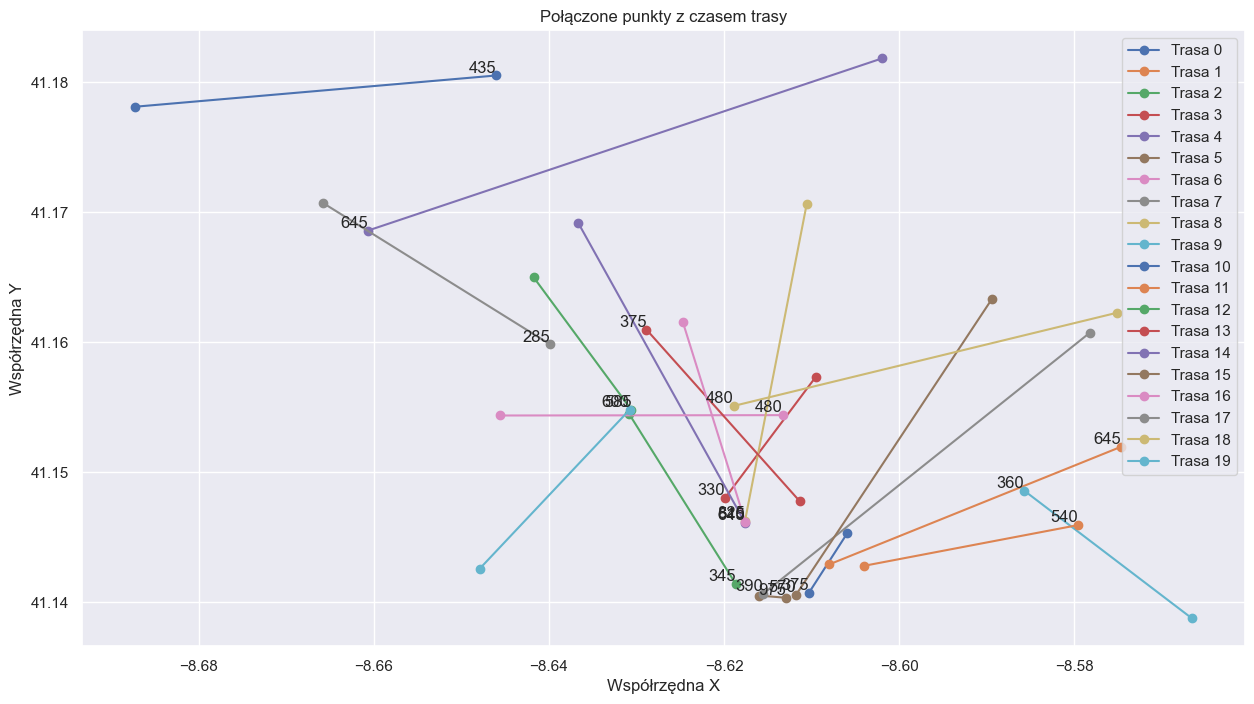

In [803]:
first_element_list = new_df['FIRST_ELEMENT'].tolist()
last_element_list = new_df['LAST_ELEMENT'].tolist()
time_in_sec_list = new_df['TIME_IN_SEC'].tolist()

# Rysowanie wykresu
plt.figure()
for i in range(20):
    first_element = first_element_list[i]
    last_element = last_element_list[i]
    time_in_sec = time_in_sec_list[i]
    plt.plot([first_element[0], last_element[0]], [first_element[1], last_element[1]], '-o', label='Trasa {}'.format(i))
    plt.text(first_element[0], first_element[1], str(time_in_sec), ha='right', va='bottom')
    #plt.text(last_element[0], last_element[1], str(time_in_sec), ha='right', va='bottom')

plt.xlabel('Współrzędna X')
plt.ylabel('Współrzędna Y')
plt.title('Połączone punkty z czasem trasy')
plt.legend()
plt.show()

In [804]:
#liczenie dlugosci wektora

In [805]:
new_df['VECTOR_LENGTH'] = new_df.apply(lambda row: np.linalg.norm(np.array(row['LAST_ELEMENT']) - np.array(row['FIRST_ELEMENT'])), axis=1)

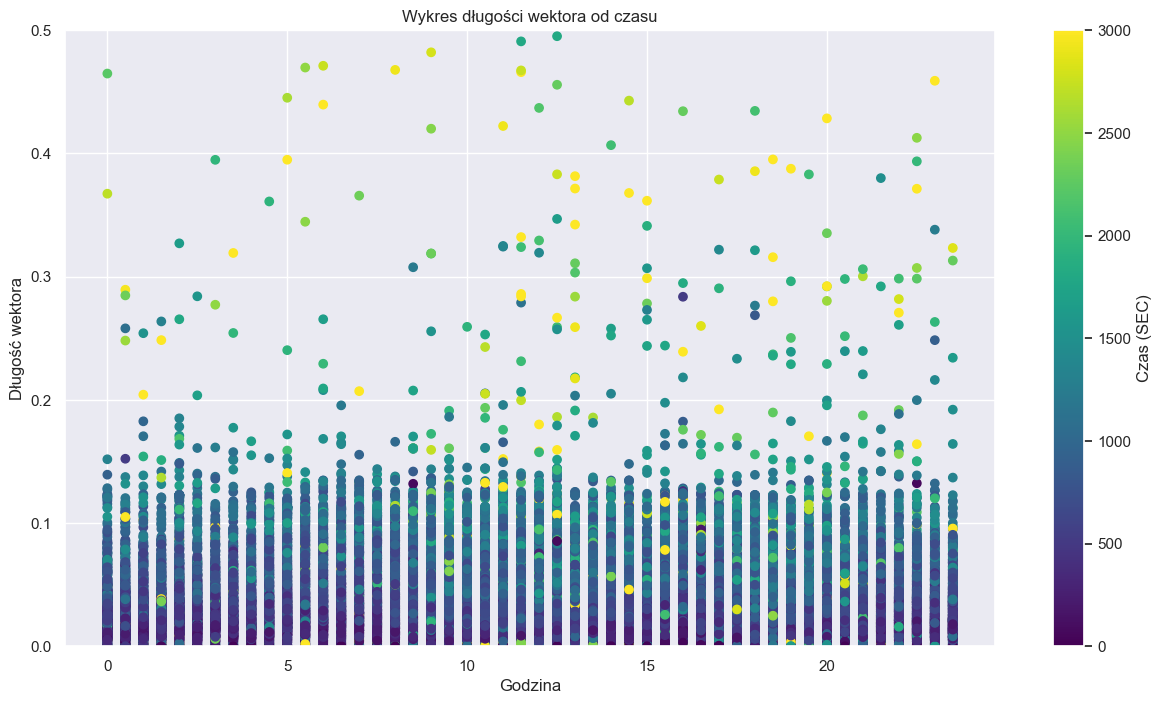

In [806]:
plt.scatter(new_df['hour'], new_df['VECTOR_LENGTH'], c=new_df['TIME_IN_SEC'], cmap='viridis')
plt.xlabel('Godzina')
plt.ylabel('Długość wektora')
plt.title('Wykres długości wektora od czasu')
plt.colorbar(label='Czas (SEC)')
#plt.xlim(0,1000)
plt.ylim(0,0.5)
plt.clim(0,3000)
plt.show()

In [807]:
#KNN

In [808]:
# zbior z zaograglanym pierwszym elementm i odjetymi wartosciami
df_dwa = new_df.copy()
df_dwa['FIRST_ELEMENT'] = df_dwa['FIRST_ELEMENT'].apply(lambda x: round(x[1] - x[0], 1))
df_dwa.head(20)


,hour,FIRST_ELEMENT,LAST_ELEMENT,TIME_IN_SEC,VECTOR_LENGTH
577,2.0,49.8,"[-8.60589, 41.145345]",375,0.006366
3,2.0,49.7,"[-8.607996, 41.142915]",645,0.034522
0,2.0,49.8,"[-8.630838, 41.154489]",345,0.017881
10,2.0,49.8,"[-8.60949, 41.157351]",330,0.013983
64,2.0,49.8,"[-8.636625, 41.169141]",645,0.029853
2,2.0,49.8,"[-8.61597, 41.14053]",975,0.003011
51,2.0,49.8,"[-8.645607, 41.154363]",480,0.032310
5,2.0,49.8,"[-8.578224, 41.160717]",390,0.042325
101,2.0,49.8,"[-8.610552, 41.170599]",825,0.025344
308,2.0,49.7,"[-8.566569, 41.138784]",360,0.021478


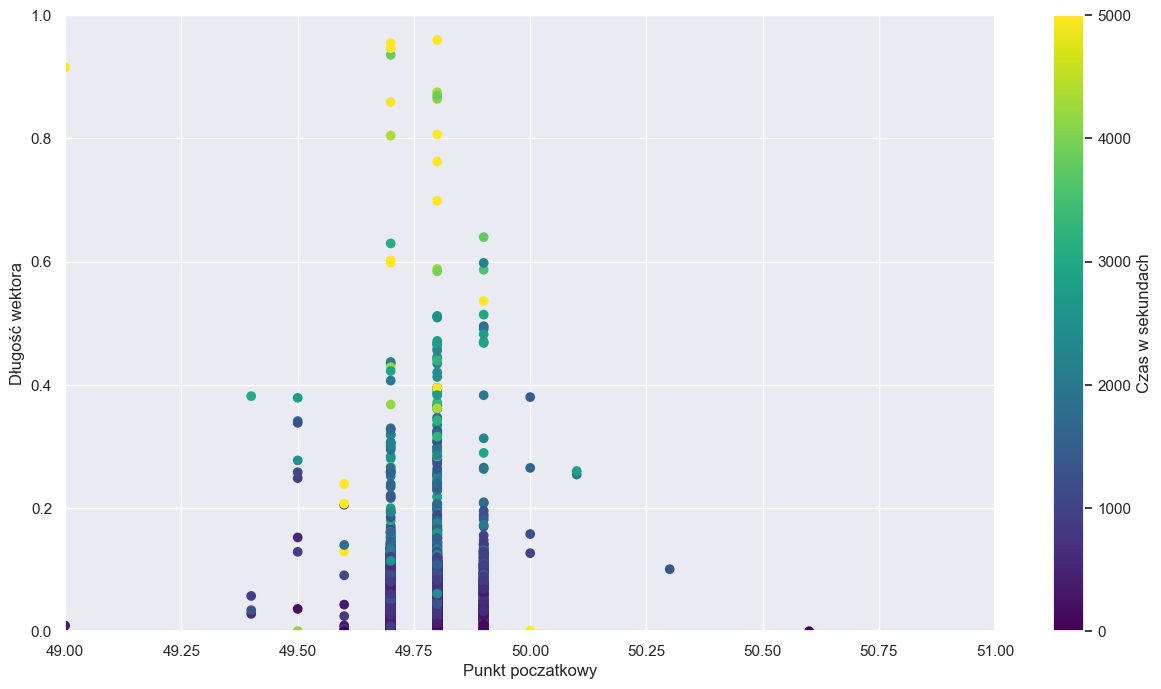

In [809]:
plt.scatter(df_dwa['FIRST_ELEMENT'], df_dwa['VECTOR_LENGTH'],  c=df_dwa['TIME_IN_SEC'], cmap='viridis')
plt.xlabel('Punkt poczatkowy')
plt.ylabel('Długość wektora')
plt.colorbar(label='Czas w sekundach')
#plt.xlim(0,1000)
plt.clim(0,5000)
plt.xlim(49,51)
plt.ylim(0,1)
plt.show()

In [810]:
#df_dwa = df_dwa .drop(df_dwa [df_dwa ['FIRST_ELEMENT'] > 54].index)


In [811]:
#sns.pairplot(df_dwa, hue="FIRST_ELEMENT")

In [812]:
class knn:
    @staticmethod
    def odleglosc(training,probka):
        odleglosc = 0
        odleglosclist = []
        for i in range(len(training)):
            odleglosc = 0
            for j in range(4):
                odleglosc += pow(training.iloc[i,j]- probka.iloc[j],2)
            odleglosclist.insert(i,math.sqrt (odleglosc))        
        training["odleglosc"] = odleglosclist
        return training.sort_values("odleglosc")
    def sprawdzenie(training, k):      
        slownik  = {"Setosa":0,"Virginica":0,"Versicolor":0}
        for i in range (k):
            match training.iloc[i,4]:
                case "Setosa":
                    slownik["Setosa"] +=1
                case "Virginica":
                    slownik["Virginica"] +=1
                case "Versicolor":
                    slownik["Versicolor"] +=1 
        maks = max(slownik, key=slownik.get)
        return maks
        

Tutaj KNN

In [813]:
class DataProcessing:
    @staticmethod
    def shuffle (x):
        for i in range(len(x)-1, 0,-1):
            j = rn.randint(0,i-1)
            x.iloc[i],x.iloc[j]=x.iloc[j],x.iloc[i]
    @staticmethod
    def normalization (x):
        values = x.select_dtypes(exclude="object") #usunie string bo string to obiekty zawsze
        columnNames=values.columns.tolist()
        for column in columnNames:
            data = x.loc[:,column] # wyciagamy cala kolumne wartosc
            min1 = min(data)
            max1 = max(data)
            for row in range(len(x)):
                xprim = (x.at[row,column]-min1)/(max1-min1)
                x.at[row,column]=xprim
    @staticmethod
    def split (x, k): # k = 0.7, czyli 70% treningowe reszta sprawdzajace, i zwraca dwa zbiory, trenujacy i walidujacy
        return x[: int(len(x)*k)], x[int(len(x)*k):]
    


In [814]:
validitingSet.head()

,hour,FIRST_ELEMENT,LAST_ELEMENT,TIME_IN_SEC,VECTOR_LENGTH
70160,13.5,"[-8.606511, 41.144589]","[-8.558361, 41.082786]",1185,0.078346
70477,13.5,"[-8.637741, 41.161815]","[-8.607564, 41.148756]",855,0.032881
70023,13.5,"[-8.649531, 41.167278]","[-8.588538, 41.166333]",555,0.061000
69663,13.5,"[-8.585658, 41.148603]","[-8.596188, 41.148684]",330,0.010530
69756,13.5,"[-8.648505, 41.153076]","[-8.677206, 41.151915]",375,0.028724


In [815]:
class knn:
    @staticmethod
    def odleglosc(training,probka):
        odleglosc = 0
        odleglosclist = []
        for i in range(len(training)):
            odleglosc = 0
            for j in (0,4):
                odleglosc += pow(training.iloc[i,j]- probka.iloc[j],2)
            odleglosclist.insert(i,math.sqrt(odleglosc))      
        #training["odleglosc"] = odleglosclist
        training.loc[:, "odleglosc"] = odleglosclist
        return training.sort_values("odleglosc")
    def sprawdzenie(training, k):  
        d = 0
        for i in range (k):
           d += training.iloc[i,3]
        return int(d/k)
    def dokladnosc (trainingSet, validitingSet, zakres):
        zgadza_sie = 0
        for i in range (zakres):
            trainingSetdwa = knn.odleglosc(trainingSet, validitingSet.iloc[i])
            wynik = knn.sprawdzenie(trainingSetdwa,5)  
            #print (i,"wynik: ", wynik , "prawidlowa wartosc", validitingSet.iloc[i,3])
            if(validitingSet.iloc[i,3]-wynik <15 & validitingSet.iloc[i,3]-wynik >-15 ):
                zgadza_sie+=1
        print("Procent: ", (zgadza_sie/zakres) *100)


In [816]:
# działa ok ale numpy jest 1000 razy szybszy
#DataProcessing.shuffle(new_df)
#trainingSet, validitingSet = DataProcessing.split(new_df, 0.7)
#print("Długosc treningowego", len(trainingSet))
#print(50*"-")
#print("Długosc walidacyjnego", len(validitingSet))

In [817]:
np.random.shuffle(new_df.values)
trainingSet, validitingSet = DataProcessing.split(new_df, 0.7)
print("Długosc treningowego", len(trainingSet))
print(50*"-")
print("Długosc walidacyjnego", len(validitingSet))

Długosc treningowego 34859
--------------------------------------------------
Długosc walidacyjnego 14940


In [818]:
#knn.dokladnosc(trainingSet, validitingSet, 100)

Drzewo Decyzyjne

In [832]:
df = baza.iloc[:50000]
df.head()

,TRIP_ID,CALL_TYPE,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]"
1,1372637303620000596,B,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[-8.642196,41.160114],[-8.644455,41.160492],[-8.646921,41.160951],[-8.649999,41.161491],[-8.653167,41.162031],[-8.656434,41.16258],[-8.660178,41.163192],[-8.663112,41.163687],[-8.666235,41.1642],[-8.669169,41.164704],[-8.670852,41.165136],[-8.670942,41.166576],[-8.66961,41.167962],[-8.668098,41.168988],[-8.66664,41.170005],[-8.665767,41.170635],[-8.66574,41.170671]]"
2,1372636951620000320,C,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-8.614215,41.140278],[-8.614773,41.140368],[-8.615907,41.140449],[-8.616609,41.140602],[-8.618472,41.141412],[-8.620623,41.142789],[-8.622558,41.144094],[-8.62506,41.144805],[-8.627436,41.144733],[-8.630082,41.145174],[-8.6319,41.146461],[-8.632584,41.147316],[-8.631252,41.148774],[-8.629713,41.150628],[-8.628804,41.152077],[-8.628579,41.152464],[-8.62875,41.152662],[-8.630424,41.15277],[-8.632683,41.152779],[-8.635131,41.152563],[-8.637705,41.153013],[-8.64036,41.15358],[-8.642205,41.154021],[-8.644068,41.154507],[-8.646453,41.154336],[-8.648613,41.1543],[-8.649504,41.154336],[-8.649837,41.154354],[-8.649837,41.1543],[-8.649882,41.154282],[-8.649936,41.1543],[-8.6499,41.154264],[-8.599383,41.141736],[-8.59653,41.140566],[-8.65008,41.154291],[-8.650395,41.153814],[-8.650377,41.153832],[-8.650359,41.153787],[-8.649891,41.153166],[-8.649369,41.152572],[-8.649198,41.152374],[-8.649711,41.151213],[-8.649117,41.150466],[-8.649117,41.149062],[-8.648613,41.148261],[-8.648424,41.148225],[-8.647587,41.148405],[-8.64594,41.148414],[-8.643861,41.148135],[-8.642763,41.148027],[-8.640918,41.14836],[-8.637759,41.148351],[-8.635338,41.147964],[-8.633277,41.147172],[-8.631513,41.146146],[-8.629776,41.14503],[-8.627814,41.144643],[-8.625996,41.144769],[-8.624088,41.144463],[-8.621325,41.143401],[-8.619444,41.141961],[-8.617365,41.140863],[-8.61597,41.14053]]"
3,1372636854620000520,C,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[-8.574696,41.151933],[-8.57466,41.15196],[-8.574723,41.151933],[-8.574714,41.151924],[-8.574714,41.151924],[-8.575164,41.150934],[-8.577135,41.150232],[-8.57853,41.148639],[-8.579745,41.147316],[-8.579358,41.146173],[-8.580744,41.14503],[-8.582904,41.14512],[-8.58438,41.146479],[-8.610849,41.145876],[-8.610012,41.146479],[-8.609058,41.146866],[-8.608968,41.147055],[-8.586027,41.148702],[-8.587197,41.149224],[-8.588205,41.148963],[-8.588835,41.147604],[-8.590176,41.147082],[-8.592543,41.146614],[-8.594721,41.146245],[-8.596737,41.146317],[-8.59869,41.146119],[-8.598816,41.146101],[-8.600193,41.146155],[-8.601057,41.146101],[-8.602344,41.14575],[-8.602785,41.145705],[-8.60328,41.145597],[-8.604045,41.145417],[-8.604657,41.144256],[-8.605854,41.142555],[-8.607951,41.142753],[-8.607978,41.142825],[-8.607996,41.142879],[-8.607987,41.142888],[-8.608005,41.142915],[-8.607996,41.142915]]"
4,1372637091620000337,C,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-8.646048,41.180049],[-8.646804,41.178888],[-8.649495,41.178465],[-8.65215,41.177961],[-8.654049,41.177196],[-8.655012,41.177925],[-8.656353,41.177853],[-8.659647,41.177277],[-8.662518,41.177619],[-8.664561,41.179221],[-8.667432,41.178537],[-8.668944,41.176674],[-8.671374,41.17518],[-8.673894,41.173308],[-8.676918,41.171841],[-8.680032,41.171949],[-8.682615,41.173191],[-8.685441,41.173776],[-8.688105,41.1

In [833]:
df.shape

(50000, 6)

In [834]:
df['Polyline Length'] = df['POLYLINE'].apply(lambda x : len(eval(x))-1)
df['Trip Time(sec)'] = df['Polyline Length'].apply(lambda x : x * 15)
df = pd.get_dummies(df, columns=['CALL_TYPE'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14408\3039422074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polyline Length'] = df['POLYLINE'].apply(lambda x : len(eval(x))-1)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14408\3039422074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trip Time(sec)'] = df['Polyline Length'].apply(lambda x : x * 15)


In [835]:
df.head()

,TRIP_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,Polyline Length,Trip Time(sec),CALL_TYPE_A,CALL_TYPE_B,CALL_TYPE_C
0,1372636858620000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]",22,330,0,0,1
1,1372637303620000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[-8.642196,41.160114],[-8.644455,41.160492],[-8.646921,41.160951],[-8.649999,41.161491],[-8.653167,41.162031],[-8.656434,41.16258],[-8.660178,41.163192],[-8.663112,41.163687],[-8.666235,41.1642],[-8.669169,41.164704],[-8.670852,41.165136],[-8.670942,41.166576],[-8.66961,41.167962],[-8.668098,41.168988],[-8.66664,41.170005],[-8.665767,41.170635],[-8.66574,41.170671]]",18,270,0,1,0
2,1372636951620000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-8.614215,41.140278],[-8.614773,41.140368],[-8.615907,41.140449],[-8.616609,41.140602],[-8.618472,41.141412],[-8.620623,41.142789],[-8.622558,41.144094],[-8.62506,41.144805],[-8.627436,41.144733],[-8.630082,41.145174],[-8.6319,41.146461],[-8.632584,41.147316],[-8.631252,41.148774],[-8.629713,41.150628],[-8.628804,41.152077],[-8.628579,41.152464],[-8.62875,41.152662],[-8.630424,41.15277],[-8.632683,41.152779],[-8.635131,41.152563],[-8.637705,41.153013],[-8.64036,41.15358],[-8.642205,41.154021],[-8.644068,41.154507],[-8.646453,41.154336],[-8.648613,41.1543],[-8.649504,41.154336],[-8.649837,41.154354],[-8.649837,41.1543],[-8.649882,41.154282],[-8.649936,41.1543],[-8.6499,41.154264],[-8.599383,41.141736],[-8.59653,41.140566],[-8.65008,41.154291],[-8.650395,41.153814],[-8.650377,41.153832],[-8.650359,41.153787],[-8.649891,41.153166],[-8.649369,41.152572],[-8.649198,41.152374],[-8.649711,41.151213],[-8.649117,41.150466],[-8.649117,41.149062],[-8.648613,41.148261],[-8.648424,41.148225],[-8.647587,41.148405],[-8.64594,41.148414],[-8.643861,41.148135],[-8.642763,41.148027],[-8.640918,41.14836],[-8.637759,41.148351],[-8.635338,41.147964],[-8.633277,41.147172],[-8.631513,41.146146],[-8.629776,41.14503],[-8.627814,41.144643],[-8.625996,41.144769],[-8.624088,41.144463],[-8.621325,41.143401],[-8.619444,41.141961],[-8.617365,41.140863],[-8.61597,41.14053]]",64,960,0,0,1
3,1372636854620000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[-8.574696,41.151933],[-8.57466,41.15196],[-8.574723,41.151933],[-8.574714,41.151924],[-8.574714,41.151924],[-8.575164,41.150934],[-8.577135,41.150232],[-8.57853,41.148639],[-8.579745,41.147316],[-8.579358,41.146173],[-8.580744,41.14503],[-8.582904,41.14512],[-8.58438,41.146479],[-8.610849,41.145876],[-8.610012,41.146479],[-8.609058,41.146866],[-8.608968,41.147055],[-8.586027,41.148702],[-8.587197,41.149224],[-8.588205,41.148963],[-8.588835,41.147604],[-8.590176,41.147082],[-8.592543,41.146614],[-8.594721,41.146245],[-8.596737,41.146317],[-8.59869,41.146119],[-8.598816,41.146101],[-8.600193,41.146155],[-8.601057,41.146101],[-8.602344,41.14575],[-8.602785,41.145705],[-8.60328,41.145597],[-8.604045,41.145417],[-8.604657,41.144256],[-8.605854,41.142555],[-8.607951,41.142753],[-8.607978,41.142825],[-8.607996,41.142879],[-8.607987,41.142888],[-8.608005,41.142915],[-8.607996,41.142915]]",42,630,0,0,1
4,1372637091620000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-8.646048,41.180049],[-8.646804,41.178888],[-8.649495,41.178465],[-8.65215,41.177961],[-8.654049,41.177196],[-8.655012,41.177925],[-8.656353,41.177853],[-8.659647,41.177277],[-8.662518,41.177619],[-8.664561,41.179221],[-8.667432,41.178537],[-8.668944,41.176674],[-8.671374,41.17518],[-8.673894,41.173308],[-8.

In [836]:

X = df[['Polyline Length', 'CALL_TYPE_A', 'CALL_TYPE_B', 'CALL_TYPE_C']]
y = df['Trip Time(sec)']

In [837]:
s = StandardScaler()
X = s.fit_transform(X)

In [838]:
print(np.mean(X))
np.std(X)

-1.7763568394002505e-17


0.9999999999999999

In [839]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3)

In [840]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (35000, 4)
The size of training output is (35000,)
**************************************************
The size of testing input is (15000, 4)
The size of testing output is (15000,)


In [844]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [845]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(max_depth=10)


{'max_depth': 10}

In [851]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [854]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.17808505191139912
R-squared:  0.9999999298891259


In [855]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  19.55447263415713
R-squared:  0.9990905955816675
